<a href="https://colab.research.google.com/github/zzerross/ai/blob/main/classification/signal/FNNSimilarSignalClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers, utils

mpl.rcParams['lines.markersize'] = 0.5
mpl.rcParams['lines.linewidth'] = 0.2

In [17]:
def make_sequence(input, output, timesteps):
  x = list(map(lambda x: input[x:x+timesteps], range(len(input) - timesteps)))
  y = output[timesteps:]
  return np.array(x), np.array(y)

classes = 3
def make_signal(c, x):
  y = [c] * len(x)
  if c == 0:
    return np.sin(x), y
  if c == 1:
    return np.sin( + x / 2) + np.cos(x / 5) + 1, y
  if c == 2:
    return np.sin(2 + x) + np.cos(x / 4), y 

def make_data(start, end, num, timesteps):
  df = None
  x = np.linspace(start, end, num)
  for c in range(classes):
    y, l = make_signal(c, x)
    plt.scatter(x, y)
    data_y, data_l = make_sequence(y, l, timesteps)
    df = pd.concat([df, pd.DataFrame(data_y, data_l)])
  return df.sample(frac=1)

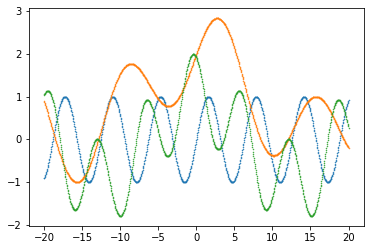

In [36]:
timesteps = 64 # 32: 93%, 64: 99%
data_n = 1000
scope = 20
df = make_data(-scope, scope, data_n, timesteps)
data_n = df.shape[0]
train_n = int(data_n * 0.8)
test_n = int(data_n * 0.2)
train_df = df.iloc[:train_n]
test_df = df.iloc[train_n:]

In [37]:
class ArgMax(layers.Layer):
  def __init__(self):
    super(ArgMax, self).__init__()

  def call(self, inputs):
    print(type(inputs))
    return float(tf.math.argmax(inputs, axis=1))

input_dim = 1
output_dim = classes

model = models.Sequential()
model.add(layers.Input(shape=(timesteps,)))
model.add(layers.Dense(timesteps * 4, activation='relu'))
model.add(layers.Dense(timesteps * 2, activation='relu'))
model.add(layers.Dense(output_dim, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['acc'])

# model.add(ArgMax())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               16640     
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 3)                 387       
                                                                 
Total params: 49,923
Trainable params: 49,923
Non-trainable params: 0
_________________________________________________________________


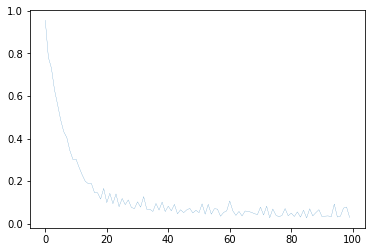

In [38]:
history = model.fit(test_df.values, utils.to_categorical(test_df.index), epochs=100, verbose=0)
plt.plot(history.history['loss'])

In [39]:
test_loss, test_acc = model.evaluate(test_df.values, utils.to_categorical(test_df.index))

18/18 [==============================] - 0s 2ms/step - loss: 0.0189 - acc: 0.9947


(559, 3)

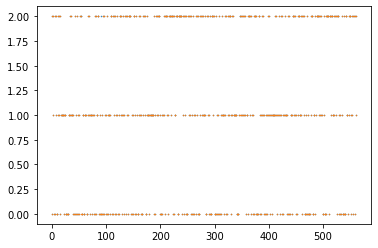

In [40]:
predicted_labels = np.argmax(model.predict(test_df.values), axis=-1)

plt.scatter(np.arange(len(test_df.index)), test_df.index)
plt.scatter(np.arange(len(predicted_labels)), predicted_labels)
equals = np.equal(test_df.index, predicted_labels)
list(equals).count(True), list(equals).count(False)